<h1><center>Text Classification Example Using News Categories</center></h1>
<h2><center> Adam Doherty </center></h2>


This is an excercise to gain familiarity in text processing and classification. The goal is to later apply the tools developed here to more meaningful financial data.

See [Kaggle for details](https://www.kaggle.com/rmisra/news-category-dataset/version/2#)

In [30]:
#imports

# basic and math 
import os
import pandas as pd
import numpy as np

# plotting
from matplotlib import pyplot as plt
import seaborn as sns

# sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
FULLWIDTHFIG = 18
%matplotlib inline

In [2]:
#load the data

cwd = os.getcwd()
data_path = os.path.join(os.path.split(cwd)[0], r'data\news-category-dataset', 'News_Category_Dataset_v2.json')
news_df = pd.read_json(data_path, lines=True)
news_df.head()


,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [7]:
# Verify and convert variable types
print(news_df.dtypes)
news_df['authors_cat']= news_df['authors'].astype('category')
news_df['category_cat']= news_df['category'].astype('category')
news_df.dtypes

authors                      object
category                     object
date                 datetime64[ns]
headline                     object
link                         object
short_description            object
authors_cat                category
category_cat               category
dtype: object


authors                      object
category                     object
date                 datetime64[ns]
headline                     object
link                         object
short_description            object
authors_cat                category
category_cat               category
dtype: object

Text(0.5, 1.0, 'Percentage of each topic category')

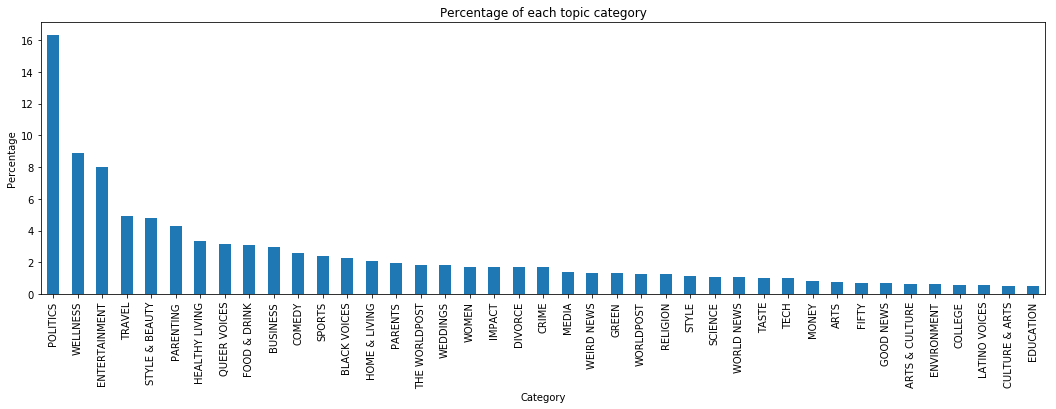

In [32]:
# distribution of categories to map to
counts = news_df['category_cat'].value_counts()
percents = ((counts/(np.sum(counts.values)))*100).plot(kind='bar', figsize=(FULLWIDTHFIG,5))
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.title("Percentage of each topic category")

In [ ]:
# first pass, use basic count vectorizer

count_vec = CountVectorizer()
clf = 
pipe =  


class Tester:
    def __init__(self, model):
        self.model = model
        self.train_results = None
        self.test_results = None
        self.percentages = None
        
    def test_word_model(self, model, trials=10, percents=20):
        '''
        test a model over various splits of training data based on percents, repeat multiple times over each split to get 
        average results, the model should be a pipeline that takes in text and spits out a prediction, it needs to generate a 
        vocabulary within itself
        '''
        self.train_results  = np.zeros((trials, percents))
        self.test_results = np.zeros((trials, percents))
        self.percentages = np.linspace(0, 1, percents + 1)
        for t in range(trials):
            for p in range(1, self.percentages - 1): # dont use 0 or 100%
                X_train, X_test, y_train, y_test = train_test_split(news_df['short_description'],
                                                                    news_df['category'],
                                                                    test_size=1 - self.percentages[p],
                                                                    random_state=t)
                # generate vocabulary only from the training set
                model.fit(X_train, y_train)
                self.train_results [t, p] = model.score(X_train, y_train)
                self.test_results [t, p] = model.score(X_test, y_test)


    def plot_results(self):
        average_test = np.mean(self.test_results, axis=0)
        average_train = np.mean(self.train_results, axis=0)
        plt.figure()
        for t in range(self.train_results.shape[0]):
            plt.plot(self.percentages[1:-1], self.train_results[1:-1], 'b.')
            plt.plot(self.percentages[1:-1], self.test_results[1:-1], 'r.')
            
        plt.plt(self.percentages[1:-1], avergate_test[1:-1], 'r-')
        plt.plt(self.percentages[1:-1], avergate_test[1:-1], 'b-')
        plt.xlabel('% data used for training')
        plt.ylabel('accuracy')
        plt.grix(True)
        plt.show()
            
            
            

        

